# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we'll be analyzing data associated with movies released between 1960-2015. In particular we'll be interested in finding trends among several variables, by answering the following questions: 

    1.	Which genres receive the highest ratings?
    2.	Do movies with a longer runtime receive worse ratings than movies with a shorter runtime?
    3.	Do movies with higher budgets generally get better ratings than those with lower budgets?
    4.	What months do movies have the highest revenue?


The dataset and documentation  can be found here: 

[Movie Data](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv) 

[Documentation](https://www.kaggle.com/tmdb/tmdb-movie-metadata/kernels)

### 1. Importing the required libraries for data analysis.

Below are the libraries we need for exploratory data analysis in this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling - gather, assess, and clean the data in preparation for data exploration

### Gather & Assess:

### 2.  Load the dataset and print a few rows to get an idea of the data in it.

In [23]:
#load dataset
df_movies = pd.read_csv('tmdb_movies.csv')
#review the first 3 rows to see columns and data format
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


The numerical data will be discussed in the cells that follow, but most of the text columns will later be deleted, because they don't help us answer the questions we posed at the beginning. The exception is the genres column. As we can see by looking at the column data, movies are associated with multiple genres and separated by a | symbol. Because there can be many different combinations of genres, using the data as it's currently provided won't work for our analysis. Instead, we'll assume the first genre listed is the primary genre for each movie, and during the data cleaning process we'll separate the first genre listed in each row into a new column to use for aswering our question that uses this data. This will reduce the genres to a smaller set of specific genres for us to work with.


### 3: Here is a description of the 21 columns to make it clear what each one represents:

| Column               | Description                                                                                                                                                                         |
|----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                   | unique identifier in tmdb for each movie                                                                                                                                                    |
| imdb_id              | unique identifier in imdb for each movie                                                                                                                                            |
| popularity           | [popularity of movie on the tmdb website](https://developers.themoviedb.org/3/getting-started/popularity) |
| budget               | movie budget when it was released                                                                                                                                                   |
| revenue              | movie revenue                                                                                                                                                                       |
| original_title       | movie title                                                                                                                                                                         |
| cast                 | movie cast                                                                                                                                                                          |
| homepage             | movie website                                                                                                                                                                       |
| director             | movie director                                                                                                                                                                      |
| tagline              | movie catchphrase                                                                                                                                                                   |
| overview             | overview of movie plot                                                                                                                                                              |
| runtime              | movie length in minutes                                                                                                                                                             |
| genres               | list of genres the movie is included in                                                                                                                                             |
| production_companies | production companies for the movie                                                                                                                                                  |
| release_date         | date the movie was released                                                                                                                                                         |
| vote_count           | number of votes for the movie on tmdb                                                                                                                                               |
| vote_average         | average movie rating between 1-10                                                                                                                                                   |
| release_year         | year movie was released                                                                                                                                                             |
| budget_adj           | adjusted budget in terms of 2010 dollars, accounting for inflation over time                                                                                                        |
| revenue_adj          | adjusted revenue in terms of 2010 dollars, accounting for inflation over time                                                                                                       |

### 4. The shape function shows how many rows and columns we're working with.

In [12]:
df_movies.shape

(10866, 21)

We're starting with 10,866 rows and 21 columns. 

### 5. Determine if there are duplicate rows and remove them so no movie data is used more than once for analysis. 

First we find out how many duplicated rows we have by using the duplicated and sum functions. During the cleaning process the row(s) will be deleted.

In [18]:
duplicate_rows = df_movies.duplicated().sum().astype(str)
print('The total number of duplicate rows to be deleted later: ' + duplicate_rows)

The total number of duplicate rows to be deleted later: 1


Just one row will be deleted later

### 6. Use the info() function to determine which columns are missing data, and whether column data types make sense. 

In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

To determine where we're missing data we look for any columns that don't have 10,866 rows. Below we can see that we're missing data in the columns: imdb_id, cast, homepage, director, taglne, keywords, overview, genres, production_companies. We won't need all of the columns to answer our questions, so some columns with missing data will be removed from our dataset. For the columns that remain, the rows with missing data will be deleted before answering our questions. 

The release_date column is currently a string (shown as object below). Later we'll change the column to the datetime data type, which we'll use to help answer one of our questions posed at the beginning.

### 7. The describe function gives us more insight, via descriptive statistics, about the numerical data in our dataset. 

In [10]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Looking at this data, there are some issues we'll want to clean up either during the data cleaning process or while we're working to answer our questions later in the process. 

The data we'll take action on later includes: 
- budget and revenue data isn't in a format that makes it easy to see the actual dollar figures
- budget and/or revenue data is zero for some of the data
- runtime is zero for some of the data

### Data Cleaning - For the data cleaning process, some of the issues identified during the above analysis will be resolved. 
- delete duplicate row
- delete columns we don't need
- format numerical columns
- delete rows with missing data
- change release_year format to datetime and extract the month to a new column
- extract the first genre from the genres column for each row into a new column

Other issues we identified will be handled during data exploration phase, such as rows where budgets and revenues are zero. The rows won't be deleted during the cleaning phase, because it would reduce the dataset by more than half, which would also remove other valueable data from other columns in the same rows. Instead, these rows will be excluded when answering questions that requre data from the budget and revenue columns.  

### 8. Delete the duplicate row with the drop_duplicates() function, and confirm no duplicates remain.

In [35]:
#drop the duplicate row
df_movies.drop_duplicates(inplace=True)

In [34]:
#confirm no duplicates remain
print('The total number of duplicate rows that remain are: ' + df_movies.duplicated().sum().astype(str))

The total number of duplicate rows that remain are: 0


### 9. Drop the columns not needed for analysis usin the drop() function.

Based on the questions we'll be answering, we can drop certain columns from our dataset:
- id
- imdb_id
- popularity
- cast
- homepage
- tagline
- keywords
- overview

In [36]:
df_movies.drop(['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'director', 'production_companies'], axis=1, inplace=True)

In [44]:
#confirm columns were dropped
df_movies.head(1)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.50,2015,137999939.30,1392445893.00


### 10. Format numerical data using the options and display attributes to show actual value with two digits after the decimal.

In [39]:
pd.options.display.float_format = "{:.2f}".format

In [43]:
#confirm formatting is now as expected
df_movies.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00
mean,14624286.06,39826896.08,102.07,217.40,5.98,2001.32,17549894.04,51369001.76
std,30914284.61,117008277.46,31.38,575.64,0.94,12.81,34307526.66,144638333.13
min,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,15000000.00,24000000.00,111.00,146.00,6.60,2011.00,20853251.08,33701729.01
max,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.00


In [257]:
#confirm the columns have been dropped
df_movies.head(1)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.50,2015,137999939.30,1392445893.00


### 11. Delete rows with missing data using the dropna() function.

Now that we've deleted some columns, we'll re-run the info() function to see if we still have columns with missing data.

In [45]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1018.6+ KB


The genres column is the only column remaining that has missing rows (23 of them). Let's look at these rows with null values, to confirm it is fine to drop them.

In [46]:
df_movies[df_movies['genres'].isnull()]

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0,0,Belli di papÃ,100,NaN,10/29/2015,21,6.10,2015,0.00,0.00
620,0,0,All Hallows' Eve 2,90,NaN,10/6/2015,13,5.00,2015,0.00,0.00
997,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,10/3/2014,13,6.80,2014,0.00,0.00
1712,0,0,Prayers for Bobby,88,NaN,2/27/2009,57,7.40,2009,0.00,0.00
1897,0,0,Jonas Brothers: The Concert Experience,76,NaN,2/27/2009,11,7.00,2009,0.00,0.00
2370,0,0,Freshman Father,0,NaN,6/5/2010,12,5.80,2010,0.00,0.00
2376,0,0,Doctor Who: A Christmas Carol,62,NaN,12/25/2010,11,7.70,2010,0.00,0.00
2853,0,0,Vizontele,110,NaN,2/2/2001,12,7.20,2001,0.00,0.00
3279,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,8/13/2008,11,6.10,2008,0.00,0.00
4547,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,7/27/2012,12,8.30,2012,0.00,0.00


These rows have low vote counts, and no revenue or budget information, so they can be removed without having much affect on our analysis. 

In [47]:
#drop rows with missing values
df_movies.dropna(inplace=True)

In [48]:
#confirm missing values dropped
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 11 columns):
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1016.4+ KB


Now all columns have 10,842 rows.

### 12. Change the data type of the release_date column to a timestamp using the to_datetime() function and create a new column with only the month.

To answer one of our questions, we need the release_month of each movie. While we could keep the date as a string and extract the value we need, I want to show how this can be done with the datetime functionality.

In [56]:
#convert release_date column to Timestamp
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [52]:
#confirm change to timestamp
type(df_movies['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [53]:
#create release_month column and assign months to it
df_movies['release_month'] =  df_movies['release_date'].dt.month

In [54]:
#confirm month column created and data looks good
df_movies.head(5)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939.30,1392445893.00,6
1,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.10,2015,137999939.30,348161292.50,5
2,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.30,2015,101199955.50,271619025.40,3
3,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.50,2015,183999919.00,1902723130.00,12
4,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.30,2015,174799923.10,1385748801.00,4


If we scroll to the far right of the data output, we can see that a new column release_month has been created and contains the month of every release date.

### 13. Remove the first genre from the genres column for every row using the apply() function and create a new column with that genre.

To answer one of our questions, we need the primary genre for every movie

In [57]:
#split the genres in each row on every | symbol, extract the first genre, & save values to a new column called primary_genre
df_movies['primary_genre'] = df_movies['genres'].apply(lambda x: x.split("|")[0])

In [58]:
#confirm the new column was created and contains the first genre value from each row in the genres column
df_movies.head(5)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,primary_genre
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939.30,1392445893.00,6,Action
1,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.10,2015,137999939.30,348161292.50,5,Action
2,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.30,2015,101199955.50,271619025.40,3,Adventure
3,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.50,2015,183999919.00,1902723130.00,12,Action
4,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.30,2015,174799923.10,1385748801.00,4,Action


If we scroll to the far right of the data output, we can see that a new column primary_genre has been created and contains the first genre from every row of the genres column.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres receive the highest ratings?

In [432]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#get the average vote(rating) for each primary_genre
#used this stack overflow for as_index=False so can sort by vote_average column: 
#https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
genre_ratings_sorted = df_movies.groupby('primary_genre', as_index=False)['vote_average', 'vote_count'].mean()
genre_ratings_sorted.sort_values('vote_average', ascending=False)

,primary_genre,vote_average,vote_count
5,Documentary,6.92,34.65
12,Music,6.61,94.09
2,Animation,6.41,284.06
10,History,6.38,246.34
4,Crime,6.22,227.46
6,Drama,6.20,165.37
18,War,6.18,259.80
14,Romance,6.13,217.61
19,Western,6.08,184.52
1,Adventure,6.05,555.66


Text(0, 0.5, 'Vote Count Average')

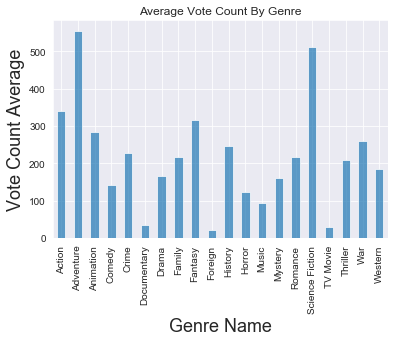

In [554]:
#wanted to show this two ways
genre_ratings_count = df_movies.groupby('primary_genre').vote_count.mean()
genre_ratings_count.plot(kind='bar', title='Average Vote Count By Genre', alpha=.7)

plt.xlabel('Genre Name', fontsize=18)
plt.ylabel('Vote Count Average', fontsize=18)

### Research Question 2: Do movies with a longer runtime receive worse ratings than movies with shorter runtime?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


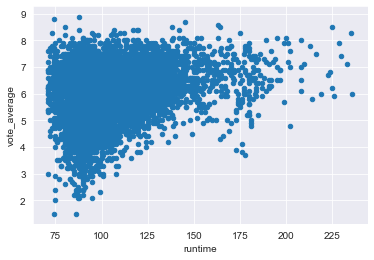

In [447]:
movies_to_plot = df_movies.query('runtime < 240 & runtime > 70')
movies_to_plot.plot(x='runtime', y='vote_average', kind='scatter')

In [337]:
#check descriptive stats on movie runtime
df_movies.runtime.describe()

count   10842.00
mean      102.14
std        31.29
min         0.00
25%        90.00
50%        99.00
75%       111.00
max       900.00
Name: runtime, dtype: float64

In [469]:
runtime_greater = df_movies.query('runtime >= 111 & runtime <= 210')

In [470]:
runtime_lesser = df_movies.query('runtime < 111 & runtime > 70')

In [471]:
#vote_average for longer running movies
longer_runtime_vote = runtime_greater.vote_average.mean()

In [472]:
#vote_average for shorter running movies
shorter_runtime_vote = runtime_lesser.vote_average.mean()

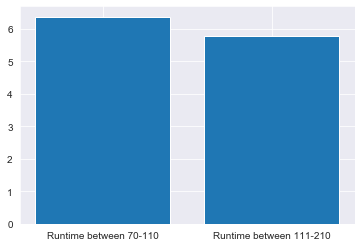

In [473]:
plt.bar(["Runtime between 70-110", "Runtime between 111-210"], [longer_runtime_vote, shorter_runtime_vote]);

### Research Question 3: Do movies with higher budgets generally get better ratings than those with lower budgets?

In [370]:
df_movies.head(1)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,primary_genre
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939.30,1392445893.00,6,Action


In [489]:
df_movies['budget_adj'].dropna(inplace=True)
df_movies[df_movies['budget_adj'].isnull()]

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,primary_genre,movies_with_budget


In [490]:
#as seen earlier, and confirmed below, there are some movies with no budget, so these will be removed from consideration for 
#answering this question
#I'm also using movies that have at least 1,000,000 in adjusted budget 
#I'll be using the adjusted budget column so all movies are considered equally
df_movies['budget_adj'].describe()

count       10842.00
mean     17587121.44
std      34334366.97
min             0.00
25%             0.00
50%             0.00
75%      20925067.03
max     425000000.00
Name: budget_adj, dtype: float64

In [518]:
#save only movies with a budget
with_budget = df_movies.query('budget_adj > 1000000')
with_budget.describe()
#with_budget.shape

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,movies_with_budget
count,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00
mean,32799394.04,85445215.20,108.21,431.64,6.05,2001.16,39362355.84,108724529.05,6.99,39362355.84
std,39360374.70,163440051.70,22.24,808.96,0.86,11.63,42232861.09,200653200.36,3.39,42232861.09
min,175000.00,0.00,0.00,10.00,2.20,1960.00,1002810.21,0.00,1.00,1002810.21
25%,7920000.00,251495.00,94.00,41.00,5.50,1996.00,10164004.34,300600.43,4.00,10164004.34
50%,20000000.00,25739015.00,104.00,135.00,6.10,2004.00,25319665.85,34253645.34,7.00,25319665.85
75%,40000000.00,96889998.00,118.00,435.00,6.60,2010.00,52828236.08,123521044.00,10.00,52828236.08
max,425000000.00,2781505847.00,540.00,9767.00,8.40,2015.00,425000000.00,2827123750.00,12.00,425000000.00


In [509]:

# df_movies['movies_with_budget'] = with_budget['budget_adj']
# df_movies['movies_with_budget'].dropna(inplace=True)
# df_movies['movies_with_budget'].shape
# # df_movies.describe()
#df_movies.plot(x='movies_with_budget', y='vote_average', kind='scatter');

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,movies_with_budget
count,10842.00,10842.00,10842.00,10842.00,10842.00,10842.00,10842.00,10842.00,10842.00,4841.00
mean,14655309.27,39911384.05,102.14,217.82,5.97,2001.31,17587121.44,51477974.92,6.83,39362355.84
std,30939713.61,117117936.32,31.29,576.18,0.93,12.81,34334366.97,144772307.64,3.44,42232861.09
min,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00,1.00,1002810.21
25%,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00,4.00,10164004.34
50%,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00,7.00,25319665.85
75%,15000000.00,24141183.50,111.00,146.00,6.60,2011.00,20925067.03,33878383.70,10.00,52828236.08
max,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.00,12.00,425000000.00


In [520]:
bin_edges = [1002810.21, 10164004.34, 25319665.85, 52828236.08, 425000000.00]
bin_names = ['Low: Lowest 25% of budgets', 'Medium: 25%-50% of budgets', 'High: 50%-75% of budgets', 
             'Highest: above 75% of budgets']
df_movies['budget_level'] = pd.cut(with_budget['budget_adj'], bin_edges, labels=bin_names);

In [524]:
df_movies.groupby('budget_level', as_index=False)['vote_average'].mean()

,budget_level,vote_average
0,Low: Lowest 25% of budgets,5.88
1,Medium: 25%-50% of budgets,6.06
2,High: 50%-75% of budgets,6.13
3,Highest: above 75% of budgets,6.13


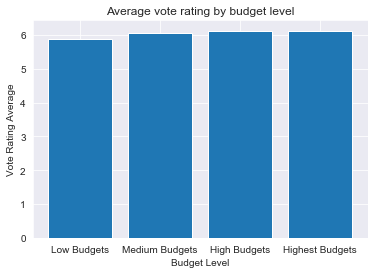

In [534]:
plt.bar([1, 2, 3, 4], [5.88, 6.06, 6.13, 6.13], tick_label=['Low Budgets', 'Medium Budgets', 'High Budgets', 'Highest Budgets'])
plt.title('Average vote rating by budget level')
plt.xlabel('Budget Level')
plt.ylabel('Vote Rating Average');

### Research Question 4: What months do movies have the highest revenue?

In [391]:
df_movies.head(1)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,primary_genre
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939.30,1392445893.00,6,Action


In [393]:
#there are movies without revenue so we'll delete those. also, we'll use adjusted revenue so everything is even
with_revenue = df_movies.query('revenue_adj > 0')
with_revenue.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00
mean,29569611.89,89238858.71,107.97,436.28,6.15,2000.92,35162081.53,115100887.63,6.96
std,40517612.64,162080146.41,21.11,806.49,0.80,11.57,43761166.89,198855667.98,3.36
min,0.00,2.00,15.00,10.00,2.10,1960.00,0.00,2.37,1.00
25%,1700000.00,7732325.00,95.00,46.00,5.60,1994.00,2329409.26,10465848.09,4.00
50%,15000000.00,31853080.00,104.00,147.00,6.20,2004.00,20328008.68,43956661.16,7.00
75%,40000000.00,99965753.00,117.00,435.00,6.70,2010.00,49735160.27,131648235.90,10.00
max,425000000.00,2781505847.00,705.00,9767.00,8.40,2015.00,425000000.00,2827123750.00,12.00


In [401]:
revenue_monthly = with_revenue.groupby('release_month', as_index=False).revenue_adj.sum()

In [404]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
revenue_monthly.sort_values('revenue_adj', ascending=False)

,release_month,revenue_adj
11,12,83493057786.48
5,6,80713223165.01
4,5,61683364497.60
6,7,58560370450.21
10,11,58498077766.77
2,3,40691921843.37
9,10,38445186532.90
7,8,32559895371.69
3,4,31653858380.24
8,9,30957858018.37


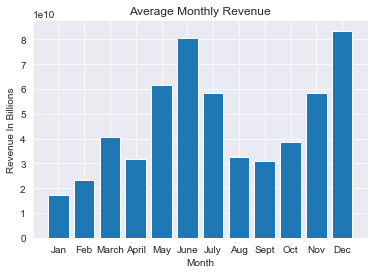

In [549]:
release_months = revenue_monthly.release_month
monthly_revenue = revenue_monthly.revenue_adj
plt.bar(release_months, monthly_revenue, tick_label=['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.title('Average Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue In Billions');

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

In [49]:
#used http://www.tablesgenerator.com/markdown_tables for the column description table
#used https://stackoverflow.com/questions/41328633/how-do-i-print-entire-number-in-python-from-describe-function for numerical data formatting
#used #used this stack overflow: https://stackoverflow.com/questions/51102615/get-month-from-date-column to extract month from datetime